Step 1 : Load libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

Step 2 : Dowload and extract the Fashion-MNIST dataset 

In [3]:
os.system('curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz')
os.system('tar -x -z -f /tmp/data.tar.gz')
os.system('rm -f /tmp/data.tar.gz')

0

Step 3 : Load it into RAM

In [4]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz")
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz")
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz")
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

Step 4 : Define the averaged perceptron 

In [9]:
def avg_perceptron(x_train,y_train, x_val, y_val, epochs):
    
    """This is the implementation if the averaged perceptron, ie. memory efficient perceptron """
    
    x_transpose = x_train.transpose()
    x_val_transpose = x_val.transpose()
    w = np.zeros(np.shape(trainxs)[0]*np.shape(trainxs)[1])
    u = np.zeros(np.shape(trainxs)[0]*np.shape(trainxs)[1])
    c = 1 
  
    epochs = 200
    
    for j in range(0, epochs):
        for i in range(0, len(x_transpose)):
            
            temp=np.matmul(w,x_transpose[i].flatten())
            
            if temp >= 0 :
                yhat = 1 
            else :
                yhat = 0
            
            ytrue = trainys[i]
            
            if ytrue != yhat:
                w += (ytrue - yhat)* x_transpose[i].flatten() 
                u += c * (ytrue - yhat)* x_transpose[i].flatten() 
                
            c = c+1
        w_update = w - 1/c * u
    W = w - 1/c * u
    return W

avg_perceptron(trainxs, trainys, devxs, devys, epochs)

array([-5.63158141e+01, -5.58634291e+01, -5.57780187e+01,  1.11426991e+01,
       -1.24926031e+01,  8.38454690e+01,  7.84107330e+01, -6.83124845e+01,
       -2.10157099e+01, -6.34032615e+01, -7.10549417e+01, -1.33870603e+02,
       -1.34732264e+02,  5.94545254e+01,  1.36912129e+02,  2.19916126e+01,
       -9.10404626e+00, -2.27491043e+01,  2.52389295e+01, -1.54385063e+01,
       -7.62057465e+01, -9.64217100e+00,  5.10097236e+01, -2.56519564e+01,
       -9.70631711e+00, -1.52614933e+01, -7.16482700e+01, -6.06182927e+01,
       -5.76801603e+01, -5.76223012e+01, -9.35326708e+01, -3.29435611e+01,
       -2.61088148e+01,  4.55805438e+01,  9.87512618e+01, -9.47297505e+01,
        5.12874132e+01,  3.40035711e-01,  1.45116954e+01,  2.47693766e+00,
       -5.14585139e+01, -6.23254912e+01,  1.69806795e+00, -1.83791864e+01,
        2.14538984e+01, -9.16465452e+00,  3.14992325e+01, -5.79402024e+01,
       -4.49750036e+01,  6.43350207e+01,  1.48591981e+02,  7.42036573e+01,
        5.94230293e+00,  

Step 5 : Train the model to convergence 

(0.9710833333333333, 264)

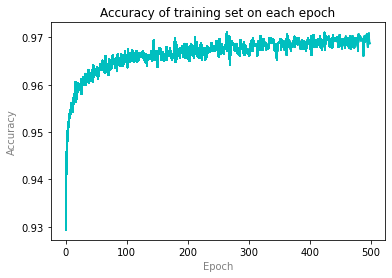

In [11]:
def avg_perceptron(x_train,y_train, x_val, y_val, epochs):
    
    #initialization
    
    flatten_input = np.shape(trainxs)[0] * np.shape(trainxs)[1] 
    x_transpose = x_train.transpose()
    x_val_transpose = x_val.transpose()
    w = np.zeros(flatten_input) 
    u = np.zeros(flatten_input) 
    c = 1
    correct = 0 
    
    #initialization for accuracy 
    
    bestW = w
    bestAcc = 0.0
    bestEp = 0.0
    accuracy_list = []
    
    #averaged perceptron implemented
    
    for j in range(0, epochs): 
        correct=0
        for i in range(0, len(x_transpose)):
            item = np.matmul(w,x_transpose[i].flatten())
            
            if item >= 0 :
                yhat = 1 
                
            else :
                yhat = 0

            ytrue = trainys[i]
            
            if ytrue != yhat:
                w += (ytrue - yhat)* x_transpose[i].flatten() 
                u += c * (ytrue - yhat)* x_transpose[i].flatten() 
                
            else :
                correct +=1 
                accuracy = correct / len(x_transpose)
                
            c = c+1 
                      
        w_epoch = w - 1/c * u
            
        if accuracy > bestAcc :
            bestAcc = accuracy
            bestW = w_epoch
            bestEp = j
        
        accuracy_list.append(accuracy)

        plt.plot(accuracy_list, color = 'c')
        plt.ylabel('Accuracy', color = 'grey')
        plt.xlabel('Epoch', color ='grey')
        plt.title ("Accuracy of training set on each epoch")
  
    return bestAcc, bestEp

epochs = 500
avg_perceptron(trainxs, trainys, devxs, devys, epochs)

Step 6 : Plot the accuracies on both the training and validation sets

accuracy trainig: 0.9293333333333333
accuracy trainig: 0.94475
accuracy trainig: 0.9466666666666667


('accuracy validation: ', 0.978, 'Epoch: ', 2)

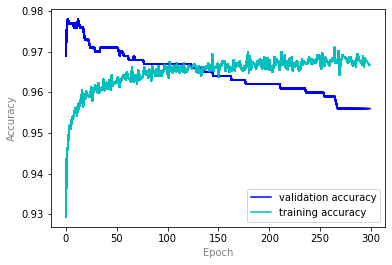

In [15]:
def avg_perceptron(x_train,y_train, x_val, y_val, epochs):  
    #initialization
    
    flatten_input = np.shape(trainxs)[0] * np.shape(trainxs)[1] 
    x_transpose = x_train.transpose()
    x_val_transpose = x_val.transpose()
    w = np.zeros(flatten_input) 
    u = np.zeros(flatten_input) 
    c = 1
    correct = 0 
    
    #initialization for accuracy 
    
    bestW = w
    bestAcc = 0.0
    bestEp = 0.0
    accuracy_list = []
    bestW_val = w
    bestAcc_val = 0.0
    bestEp_val = 0.0
    accuracy_list_val = []
    
    
    #averaged perceptron implemented
    
    for j in range(0, epochs): 
        correct=0
        for i in range(0, len(x_transpose)):
            item = np.matmul(w,x_transpose[i].flatten())
            
            if item >= 0 :
                yhat = 1 
                
            else :
                yhat = 0

            ytrue = trainys[i]
            
            if ytrue != yhat:
                w += (ytrue - yhat)* x_transpose[i].flatten() 
                u += c * (ytrue - yhat)* x_transpose[i].flatten() 
                
            else :
                correct +=1 
                accuracy = correct / len(x_transpose)
                
            c = c+1 
                      
        w_epoch = w - 1/c * u
        
        item_val = devxs.transpose().reshape(len(devys), devxs.shape[0]**2) @ w_epoch
        yhat_val = np.zeros(len(item_val))
        
        for k in range(len(item_val)):
            if item_val[k] >= 0:
                yhat_val[k] = 1 
            
        correct_val = 0 
        for i in range(len(yhat_val)):
            if yhat_val[i] == devys[i]:
                correct_val +=1
        accuracy_val = correct_val / len(yhat_val)
    
            
        if accuracy_val > bestAcc_val :
            bestAcc_val = accuracy_val
            bestW_val = w_epoch
            bestEp_val = j
            
            
        accuracy_list_val.append(accuracy_val)

        plt.plot(accuracy_list_val, color = 'b', label = 'validation')
        plt.ylabel('Accuracy of the validation set', color = 'grey')
        plt.xlabel('Epoch', color ='grey')
            
        if bestEp_val == j:
            print('accuracy trainig:', accuracy)
        
        accuracy_list.append(accuracy)

        plt.plot(accuracy_list, color = 'c', label = 'training ')
        plt.legend(["validation accuracy", "training accuracy"])
        plt.ylabel('Accuracy', color = 'grey')
        plt.xlabel('Epoch', color ='grey')
        

    return  ('accuracy validation: ', bestAcc_val, 'Epoch: ', bestEp_val)

epochs = 300
avg_perceptron(trainxs, trainys, devxs, devys, epochs)